# Cargar datos

In [4]:
import pandas as pd

output_name = "isomorphic_labeled_groups_filtered"

df_isomor = pd.read_csv("isomorphic_groups_labeled_filtered.csv", sep=";")

df_class = pd.read_csv("clasificacion_resultados3.csv")

In [5]:
df_class["ID"] -= 1
df_class

,ID,Clasificación,Oración
0,0,Compleja,Además se le pediría a las empresas interesada...
1,1,Compuesta-Compleja,Producto del fin del imperio y las invasiones ...
2,2,Compleja,"MADRID, 3 (EUROPA PRESS) Las tenistas española..."
3,3,Compleja,Los pacientes con diabetes son cuatro veces má...
4,4,Simple,Aclarando hacia todo el mundo Valderrama Y Edu...
...,...,...,...
14182,14182,Simple,San Julián de Morcelle (en gallego: San Xulián...
14183,14183,Compuesta-Compleja,Una vez que el Hijo de Krypton suelta el misil...
14184,14184,Compleja,"Jazmin es todo lo contrario, es tímida y calla..."
14185,14185,Simple,Esta teoría se avenía bien con la creencia del...


In [6]:
string = "es_gsd-ud-train_{}.graphml"
df_class["filename"] = df_class["ID"].apply(lambda x: string.format(x))
df_class

,ID,Clasificación,Oración,filename
0,0,Compleja,Además se le pediría a las empresas interesada...,es_gsd-ud-train_0.graphml
1,1,Compuesta-Compleja,Producto del fin del imperio y las invasiones ...,es_gsd-ud-train_1.graphml
2,2,Compleja,"MADRID, 3 (EUROPA PRESS) Las tenistas española...",es_gsd-ud-train_2.graphml
3,3,Compleja,Los pacientes con diabetes son cuatro veces má...,es_gsd-ud-train_3.graphml
4,4,Simple,Aclarando hacia todo el mundo Valderrama Y Edu...,es_gsd-ud-train_4.graphml
...,...,...,...,...
14182,14182,Simple,San Julián de Morcelle (en gallego: San Xulián...,es_gsd-ud-train_14182.graphml
14183,14183,Compuesta-Compleja,Una vez que el Hijo de Krypton suelta el misil...,es_gsd-ud-train_14183.graphml
14184,14184,Compleja,"Jazmin es todo lo contrario, es tímida y calla...",es_gsd-ud-train_14184.graphml
14185,14185,Simple,Esta teoría se avenía bien con la creencia del...,es_gsd-ud-train_14185.graphml


In [7]:
desc = df_class.groupby("Clasificación").size().reset_index(name='counts')
desc["%"] = desc["counts"] / desc["counts"].sum() * 100
desc

,Clasificación,counts,%
0,Compleja,6309,44.470290
1,Compuesta,666,4.694439
2,Compuesta-Compleja,1898,13.378445
3,Indeterminada (múltiples verbos sin subordinac...,1290,9.092831
4,Simple,3780,26.644111
5,Unimembre,244,1.719884


# Generate DDBB format for isomorphic groups

In [8]:
import csv
from pathlib import Path

def explode(in_csv: Path, out_csv: Path):
    out_rows = []
    with in_csv.open(newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f, delimiter=';')
        for row in reader:
            sig = row.get('signature') or row.get('wl_signature')
            cls_size = int(row['count'])
            # files are pipe-separated, possibly quoted
            files = row['files'].strip().strip('"').split('|')
            for fp in files:
                fp = fp.strip()
                out_rows.append({
                    'filename': Path(fp).name,
                    'filepath': fp,
                    'wl_signature': sig,
                    'class_size': cls_size,
                })

    with out_csv.open('w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=out_rows[0].keys())
        writer.writeheader()
        writer.writerows(out_rows)
        
explode(Path("isomorphic_groups_labeled_filtered.csv"), Path("isomorphic_groups_labeled_filtered_bbdd.csv"))

In [9]:
df_iso_groups = pd.read_csv("isomorphic_groups_labeled_bbdd.csv")
df_iso_groups.head(10)

,filename,filepath,wl_signature,class_size
0,es_gsd-ud-train_7825.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(3,):1|1_(3,):1|2_(3,):1|3_(0, 1, 2, 6, 8):1...",2
1,es_gsd-ud-train_6750.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(3,):1|1_(3,):1|2_(3,):1|3_(0, 1, 2, 6, 8):1...",2
2,es_gsd-ud-train_12948.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(11,):1|10_(11,):1|11_(0, 10, 13):1|12_(13,)...",1
3,es_gsd-ud-train_9745.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(6,):1|10_(13,):1|11_(18,):1|12_(13,):1|13_(...",1
4,es_gsd-ud-train_3290.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(11,):1|10_(12,):1|11_(0, 1, 32, 36):1|12_(9...",1
5,es_gsd-ud-train_1588.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(21,):1|10_(6, 7, 9, 13, 14, 17, 46):1|11_(2...",1
6,es_gsd-ud-train_12830.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(21,):1|10_(21,):1|11_(13,):1|12_(13,):1|13_...",1
7,es_gsd-ud-train_8337.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(4,):1|10_(2, 3, 4, 9):1|11_(2,):1|1_(2,):1|...",1
8,es_gsd-ud-train_12958.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(20,):1|10_(12,):1|11_(20,):1|12_(8, 9, 10, ...",1
9,es_gsd-ud-train_9755.graphml,../data/graphs/UD_Spanish-GSD/es_gsd-ud-train_...,"0_(1, 11, 13):1|10_(1,):2|11_(0,):1|12_(13,):3...",1


In [10]:
df_iso_groups[df_iso_groups["filename"] == "es_gsd-ud-train_8960.graphml"]["wl_signature"].values[0]

'0_(1,):1|1_(0, 2, 3):1|2_(1,):1|3_(1, 4, 8):1|4_(3, 5):1|5_(4, 7):1|6_(7,):1|7_(5, 6):1|8_(3,):1'

In [11]:
join_df = df_iso_groups.merge(df_class, left_on="filename", right_on="filename", how="inner")
join_df = join_df.drop(columns=["filepath"])
join_df.head(10)

,filename,wl_signature,class_size,ID,Clasificación,Oración
0,es_gsd-ud-train_7825.graphml,"0_(3,):1|1_(3,):1|2_(3,):1|3_(0, 1, 2, 6, 8):1...",2,7825,Simple,Nasija es una película del año 2006.
1,es_gsd-ud-train_6750.graphml,"0_(3,):1|1_(3,):1|2_(3,):1|3_(0, 1, 2, 6, 8):1...",2,6750,Simple,Dadichi fue un personaje de la mitología hindu...
2,es_gsd-ud-train_12948.graphml,"0_(11,):1|10_(11,):1|11_(0, 10, 13):1|12_(13,)...",1,12948,Compleja,"Se alimenta de insectos, que busca entre las h..."
3,es_gsd-ud-train_9745.graphml,"0_(6,):1|10_(13,):1|11_(18,):1|12_(13,):1|13_(...",1,9745,Compleja,Aunque los tres distritos de las Azores y el M...
4,es_gsd-ud-train_3290.graphml,"0_(11,):1|10_(12,):1|11_(0, 1, 32, 36):1|12_(9...",1,3290,Compleja,"A cambio de su capital y el riesgo, exigía nad..."
5,es_gsd-ud-train_1588.graphml,"0_(21,):1|10_(6, 7, 9, 13, 14, 17, 46):1|11_(2...",1,1588,Compleja,En el pasado se produjo un hundimiento del ter...
6,es_gsd-ud-train_12830.graphml,"0_(21,):1|10_(21,):1|11_(13,):1|12_(13,):1|13_...",1,12830,Compleja,"En sus palabras, el embajador de Viet Nam en e..."
7,es_gsd-ud-train_8337.graphml,"0_(4,):1|10_(2, 3, 4, 9):1|11_(2,):1|1_(2,):1|...",1,8337,Simple,El municipio de Howards Creek se encuentra ubi...
8,es_gsd-ud-train_12958.graphml,"0_(20,):1|10_(12,):1|11_(20,):1|12_(8, 9, 10, ...",1,12958,Compleja,"Siendo muy joven a finales del siglo XVI, Saak..."
9,es_gsd-ud-train_9755.graphml,"0_(1, 11, 13):1|10_(1,):2|11_(0,):1|12_(13,):3...",1,9755,Simple,"Hugh Low (1824 -- 1905) fue un naturalista, ad..."


In [ ]:
def get_file

In [24]:

output_1 = join_df.groupby("wl_signature").agg(diferentes=("Clasificación","nunique"), size_group=("filename", "count"), sentences=("ID", list)).reset_index()
output_1 = output_1[output_1["size_group"] > 5]
output_1

,wl_signature,diferentes,size_group,sentences
101,"0_(1, 2):1|1_(0,):1|2_(0,):1",2,12,"[10125, 2860, 3389, 8404, 3133, 1387, 3616, 80..."
318,"0_(1,):1|1_(0, 2):1|2_(1, 4, 5):1|3_(4,):1|4_(...",2,8,"[10009, 9687, 7799, 8368, 11181, 8011, 8452, 5..."
319,"0_(1,):1|1_(0, 2):1|2_(1, 4, 6):1|3_(4,):1|4_(...",3,9,"[2357, 5854, 743, 6089, 5679, 13880, 10386, 99..."
333,"0_(1,):1|1_(0, 2):1|2_(1,):1",3,15,"[5693, 1504, 9019, 5007, 479, 2189, 13538, 126..."
384,"0_(1,):1|1_(0, 3):1|2_(3,):1|3_(1, 2, 4):1|4_(...",2,16,"[6231, 2638, 6144, 8901, 11050, 5751, 5987, 11..."
392,"0_(1,):1|1_(0, 3):1|2_(3,):1|3_(1, 2, 5, 6):1|...",3,13,"[5246, 151, 6815, 7487, 9831, 10787, 13689, 20..."
406,"0_(1,):1|1_(0, 3, 4):1|2_(3,):1|3_(1, 2):1|4_(...",3,40,"[1241, 11237, 7792, 6608, 6645, 901, 9838, 328..."
412,"0_(1,):1|1_(0, 3, 5):1|2_(3,):1|3_(1, 2, 4):1|...",3,8,"[14104, 1034, 13257, 9840, 12644, 11817, 1141,..."
421,"0_(1,):1|1_(0, 3, 6):1|2_(3,):1|3_(1, 2, 5):1|...",4,7,"[7809, 5060, 2073, 9791, 2550, 5654, 9879]"
440,"0_(1,):1|1_(0, 4):1|2_(4,):1|3_(4,):1|4_(1, 2,...",1,6,"[7371, 4849, 3656, 11022, 404, 1895]"


In [25]:
output_2 = (join_df.pivot_table(columns='Clasificación',
                           index='wl_signature',
                      aggfunc='size',  # count rows per value
                      fill_value=0)
         ).reset_index().rename_axis(None, axis=1)
output_2

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple,Unimembre
0,"0_(0,):2",0,0,0,0,0,1
1,"0_(1, 1):1|1_(0,):2",0,0,0,0,0,1
2,"0_(1, 1, 1, 2, 3, 5):1|1_(0,):3|2_(0,):1|3_(0,...",1,0,0,0,0,0
3,"0_(1, 1, 1, 3, 22, 29):1|10_(8, 9):1|11_(22,):...",1,0,0,0,0,0
4,"0_(1, 1, 2):1|1_(0,):2|2_(0,):1",0,0,0,0,0,4
...,...,...,...,...,...,...,...
13224,"0_(9,):2|10_(9,):1|11_(13,):1|12_(13,):1|13_(1...",0,0,0,0,1,0
13225,"0_(9,):2|10_(9,):1|11_(9, 15):1|12_(15,):1|13_...",1,0,0,0,0,0
13226,"0_(9,):3|10_(11,):1|11_(9, 10, 13):1|12_(13,):...",1,0,0,0,0,0
13227,"0_(9,):3|10_(12,):1|11_(12,):1|12_(9, 10, 11, ...",0,0,0,0,1,0


In [28]:
output_1[["wl_signature", "sentences"]].merge(output_2, on="wl_signature", how="left").to_csv("BBDD_isomorphic_labeled_filtered_>5.csv", sep=";", index=False)

In [16]:
cols = ['Compleja','Compuesta','Compuesta-Compleja','Indeterminada (múltiples verbos sin subordinación/coordinación clara)', "Simple"]

# 1) Range (peak-to-peak)
import numpy as np
    
out_filtered = out[out["group_size"] > 1]
out_filtered['spread'] = out_filtered[cols].to_numpy().ptp(axis=1)          # same as max-min

# 2) Standard deviation (population)
out_filtered['row_std'] = out_filtered[cols].std(axis=1, ddof=0)

# 3) Mean absolute deviation
m = out_filtered[cols].mean(axis=1)
out_filtered['mad'] = (out_filtered[cols].sub(m, axis=0)).abs().mean(axis=1)

# Get the rows with the tightest values
tight_rows = out_filtered.sort_values(['group_size','spread'], ascending=[False, True]).head(20)  # or use 'row_std' / 'mad'
tight_rows

/var/folders/rn/46s8dp4j7zng96g_212pqjlh0000gp/T/ipykernel_66140/2934903349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_filtered['spread'] = out_filtered[cols].to_numpy().ptp(axis=1)          # same as max-min
/var/folders/rn/46s8dp4j7zng96g_212pqjlh0000gp/T/ipykernel_66140/2934903349.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_filtered['row_std'] = out_filtered[cols].std(axis=1, ddof=0)
/var/folders/rn/46s8dp4j7zng96g_212pqjlh0000gp/T/ipykernel_66140/2934903349.py:14: SettingWithCo

,wl_signature,Compleja,Compuesta,Compuesta-Compleja,Indeterminada (múltiples verbos sin subordinación/coordinación clara),Simple,Unimembre,group_size,spread,row_std,mad
406,"0_(1,):1|1_(0, 3, 4):1|2_(3,):1|3_(1, 2):1|4_(...",0.000000,0.000000,0.0,0.075000,0.800000,0.125000,40,0.800000,0.313847,0.250000
6806,"0_(14,):1|10_(8, 9, 12):1|11_(14,):1|12_(10,):...",0.000000,0.000000,0.0,0.000000,1.000000,0.000000,36,1.000000,0.400000,0.320000
10837,"0_(5,):1|10_(1, 1, 2, 8, 9, 11):1|11_(10,):1|1...",0.000000,0.000000,0.0,0.074074,0.925926,0.000000,27,0.925926,0.364095,0.290370
11955,"0_(7,):1|10_(7, 8, 9):1|11_(13,):1|12_(13,):1|...",0.000000,0.000000,0.0,0.000000,1.000000,0.000000,23,1.000000,0.400000,0.320000
12262,"0_(8,):1|10_(11,):1|11_(8, 9, 10):1|12_(14,):1...",0.000000,0.000000,0.0,0.000000,1.000000,0.000000,23,1.000000,0.400000,0.320000
7659,"0_(2, 3):1|1_(2,):1|2_(0, 1):1|3_(0,):1",0.045455,0.000000,0.0,0.000000,0.954545,0.000000,22,0.954545,0.377683,0.301818
451,"0_(1,):1|1_(0, 4, 5):1|2_(4,):1|3_(4,):1|4_(1,...",0.000000,0.000000,0.0,0.111111,0.722222,0.166667,18,0.722222,0.281091,0.222222
9806,"0_(3,):1|10_(1,):1|1_(8, 9, 10):1|2_(7,):1|3_(...",1.000000,0.000000,0.0,0.000000,0.000000,0.000000,18,1.000000,0.400000,0.320000
12815,"0_(9,):1|10_(11,):1|11_(9, 10):1|12_(9,):1|13_...",1.000000,0.000000,0.0,0.000000,0.000000,0.000000,17,1.000000,0.400000,0.320000
11580,"0_(6,):2|10_(11,):1|11_(1, 9, 10):1|1_(3, 11):...",1.000000,0.000000,0.0,0.000000,0.000000,0.000000,17,1.000000,0.400000,0.320000


In [17]:
tight_rows.loc[7878]["wl_signature"]  # Example to check a specific signature

'0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|4_(6,):1|5_(6,):1|6_(3, 4, 5):1|7_(2,):1'

In [18]:
join_df[join_df["wl_signature"] == '0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|4_(6,):1|5_(6,):1|6_(3, 4, 5):1|7_(2,):1']  # Check for a specific signature

,filename,wl_signature,class_size,ID,Clasificación,Oración
100,es_gsd-ud-train_5387.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,5387,Compleja,Worth se encuentra ubicado en las coordenadas.
101,es_gsd-ud-train_3229.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,3229,Compleja,Cleveland se encuentra ubicado en las coordena...
102,es_gsd-ud-train_496.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,496,Compleja,Garfield se encuentra ubicado en las coordenadas.
103,es_gsd-ud-train_8435.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,8435,Compleja,Farmington se encuentra ubicado en las coorden...
104,es_gsd-ud-train_7236.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,7236,Compleja,Streeter se encuentra ubicada en las coordenadas.
105,es_gsd-ud-train_3980.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,3980,Compleja,Freemansburg se encuentra ubicado en las coord...
106,es_gsd-ud-train_4298.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,4298,Compleja,Loup se encuentra ubicado en las coordenadas.
107,es_gsd-ud-train_11863.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,11863,Compleja,Oblong se encuentra ubicada en las coordenadas.
108,es_gsd-ud-train_4686.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,4686,Compleja,Nikolaevsk se encuentra ubicada en las coorden...
109,es_gsd-ud-train_138.graphml,"0_(2,):1|1_(2,):1|2_(0, 1, 3, 7):1|3_(2, 6):1|...",15,138,Simple,Batavia se encuentra ubicada en las coordenadas.


In [17]:
out_filtered[(out_filtered["spread"]<= 0.80)&(out_filtered["group_size"] > 10)].iloc[2]

wl_signature                                                             0_(1,):3|1_(0, 0, 0):1
Compleja                                                                                    0.0
Compuesta                                                                                   0.0
Compuesta-Compleja                                                                          0.0
Indeterminada (múltiples verbos sin subordinación/coordinación clara)                  0.055556
Simple                                                                                 0.611111
Unimembre                                                                              0.333333
group_size                                                                                   18
spread                                                                                 0.611111
row_std                                                                                0.239856
mad                                     

In [18]:
join_df[join_df["wl_signature"] == "0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1"]

,filename,wl_signature,class_size,ID,Clasificación,Oración
4021,es_gsd-ud-train_81.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,81,Compleja,La estabilidad financiera es algo que Macedoni...
4022,es_gsd-ud-train_10315.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,10315,Simple,"Esa noche, Faith va al Bronze."
4023,es_gsd-ud-train_6938.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,6938,Compleja,Es autor de una docena de libros especializados.
4024,es_gsd-ud-train_8400.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,8400,Simple,La gente normal la ve en 1 minuto.
4025,es_gsd-ud-train_2198.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,2198,Simple,También tuvo varios casos notables de gran esc...
4026,es_gsd-ud-train_7093.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,7093,Indeterminada (múltiples verbos sin subordinac...,El gobierno constitucionalista tuvo que manten...
4027,es_gsd-ud-train_4382.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,4382,Simple,Ha habido un amplio comentario sobre la cuestión.
4028,es_gsd-ud-train_6258.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,6258,Simple,A esta obra le siguieron varias comedias ligeras.
4029,es_gsd-ud-train_2190.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,2190,Simple,En su lado Este posee una pequeña sacristía.
4030,es_gsd-ud-train_5286.graphml,"0_(1,):4|1_(0, 0, 3):2|2_(3,):2|3_(1, 1, 2, 2):1",12,5286,Simple,Esta clasificado como un puerto de categoría E...


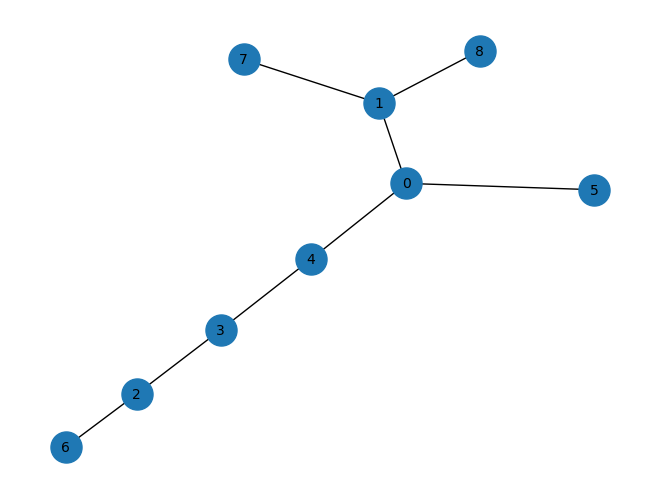

In [19]:
import networkx as nx
G1 = nx.convert_node_labels_to_integers(nx.read_graphml("UD_Spanish-GSD/es_gsd-ud-train_8960.graphml").to_undirected(), ordering="decreasing degree")
nx.draw(G1, with_labels=True, node_size=500, font_size=10)

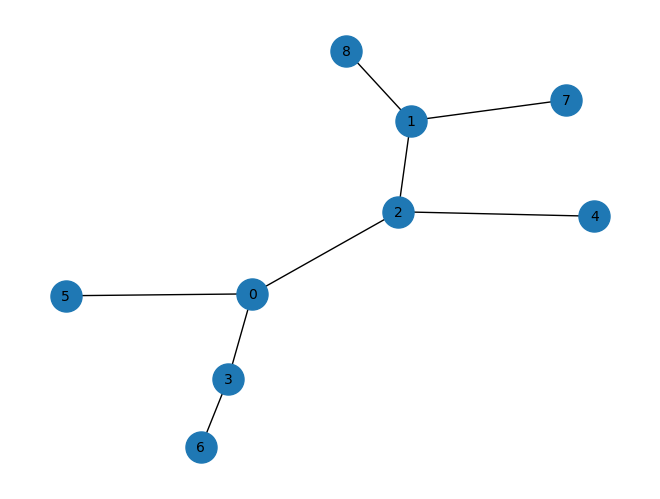

In [20]:
G2 = nx.convert_node_labels_to_integers(nx.read_graphml("UD_Spanish-GSD/es_gsd-ud-train_7927.graphml").to_undirected(), ordering="decreasing degree")
nx.draw(G2, with_labels=True, node_size=500, font_size=10)

In [1]:
from __future__ import annotations
from pathlib import Path
from collections import defaultdict
from collections import Counter
import copy

# ---------- WL over trees ----------
def wl_tree_signature(G: nx.Graph) -> str:
    """
    1-WL color refinement on an (unlabeled) tree G.
    Returns a canonical signature string usable as a dict key.
    """
    # Relabel to 0..n-1 for array-friendly processing
    G = nx.relabel.convert_node_labels_to_integers(G, ordering="sorted")  # keeps attrs by default
    n = G.number_of_nodes()

    # adjacency as list of lists for speed
    adj = [list(G.neighbors(v)) for v in range(n)]  # neighbors() yields iterator.  [oai_citation:6‡networkx.org](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html?utm_source=chatgpt.com)
    colors = [0] * n
    tmp = [None] * n
    i = 0
    signature = ""
    while True:      
        
        for v in range(n):
            neigh_cols = sorted(colors[u] for u in adj[v])
            tmp[v] = str(colors[v]) +"_"+ str(tuple(neigh_cols))
        # compress tuples → small ints
        mapping = {}
        next_c = 0
        new_colors = [0] * n
        for v in range(n):
            key = tmp[v]
            #print(f"key is {key}")
            if key not in mapping:
                mapping[key] = next_c
                next_c += 1
            new_colors[v] = mapping[key]
        if new_colors == colors:
            break
        colors = new_colors
    hist = defaultdict(int)
    
    for c in tmp:
        hist[c] += 1
    signature += "|".join(f"{c}:{hist[c]}" for c in sorted(hist))
    return signature


In [ ]:
from __future__ import annotations
from pathlib import Path
from collections import defaultdict
from collections import Counter

# ---------- WL over trees ----------
def wl_tree_signature(G: nx.Graph, colors_dict: dict) -> str:
    """
    1-WL color refinement on an (unlabeled) tree G.
    Returns a canonical signature string usable as a dict key.
    """
    # Relabel to 0..n-1 for array-friendly processing
    G = nx.relabel.convert_node_labels_to_integers(G, ordering="sorted")  # keeps attrs by default
    n = G.number_of_nodes()

    # adjacency as list of lists for speed
    adj = [list(G.neighbors(v)) for v in range(n)]  # neighbors() yields iterator.  [oai_citation:6‡networkx.org](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html?utm_source=chatgpt.com)
    next_c = 0
    colors = [0] * n
    tmp = [None] * n
    
    signature = ""
    
    while True:      
        
        for v in range(n):
            neigh_cols = sorted(colors[u] for u in adj[v])
            tmp[v] = str(colors[v]) +"_"+ str(tuple(neigh_cols))
        # compress tuples → small ints
         
        new_colors = [0] * n
        for v in range(n):
            key = tmp[v]
            print(f"key: {key}, next_c: {next_c}")
            if key not in colors_dict:
                colors_dict[key] = next_c
                next_c += 1
            new_colors[v] = colors_dict[key]
        if new_colors == colors:
            break

        colors = new_colors
    hist = defaultdict(int)
    for c in colors:
        hist[c] += 1
    signature += "|".join(f"{c}:{hist[c]}" for c in sorted(hist))
    return signature

In [18]:

init_colors_dict = {}
#wl_tree_signature(G1)==wl_tree_signature(G2)

In [9]:
wl_tree_signature(G1)==wl_tree_signature(G2)

False

In [8]:
wl_tree_signature(G2)

'0_(2, 3, 5):1|1_(2, 7, 7):1|2_(0, 1, 4):1|3_(0, 6):1|4_(2,):1|5_(0,):1|6_(3,):1|7_(1,):2'

In [172]:
sorted(dict(G1.degree()).values()) == sorted(dict(G2.degree()).values())

False